In [1]:
import pandas as pd
import numpy as np
import math
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import preprocessing

In [2]:
data=pd.read_csv("C:\\Users\\prade\\Documents\\MiniProject-II\\rainfall.csv")
print("Data heads:")
print(data.head())
print("Null values in the dataset before preprocessing:")
print(data.isnull().sum())
print("Filling null values with mean of that particular column")
data=data.fillna(np.mean(data))
print("Mean of data:")
print(np.mean(data))
print("Null values in the dataset after preprocessing:")
print(data.isnull().sum())
print("\n\nShape: ",data.shape)

Data heads:
                 SUBDIVISION  YEAR   JAN    FEB   MAR    APR    MAY    JUN  \
0  ANDAMAN & NICOBAR ISLANDS  1901  49.2   87.1  29.2    2.3  528.8  517.5   
1  ANDAMAN & NICOBAR ISLANDS  1902   0.0  159.8  12.2    0.0  446.1  537.1   
2  ANDAMAN & NICOBAR ISLANDS  1903  12.7  144.0   0.0    1.0  235.1  479.9   
3  ANDAMAN & NICOBAR ISLANDS  1904   9.4   14.7   0.0  202.4  304.5  495.1   
4  ANDAMAN & NICOBAR ISLANDS  1905   1.3    0.0   3.3   26.9  279.5  628.7   

     JUL    AUG    SEP    OCT    NOV    DEC  ANNUAL  Jan-Feb  Mar-May  \
0  365.1  481.1  332.6  388.5  558.2   33.6  3373.2    136.3    560.3   
1  228.9  753.7  666.2  197.2  359.0  160.5  3520.7    159.8    458.3   
2  728.4  326.7  339.0  181.2  284.4  225.0  2957.4    156.7    236.1   
3  502.0  160.1  820.4  222.2  308.7   40.1  3079.6     24.1    506.9   
4  368.7  330.5  297.0  260.7   25.4  344.7  2566.7      1.3    309.7   

   Jun-Sep  Oct-Dec  
0   1696.3    980.3  
1   2185.9    716.7  
2   1874.0    

In [3]:
print ("Info")
print(data.info())

Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
SUBDIVISION    4116 non-null object
YEAR           4116 non-null int64
JAN            4116 non-null float64
FEB            4116 non-null float64
MAR            4116 non-null float64
APR            4116 non-null float64
MAY            4116 non-null float64
JUN            4116 non-null float64
JUL            4116 non-null float64
AUG            4116 non-null float64
SEP            4116 non-null float64
OCT            4116 non-null float64
NOV            4116 non-null float64
DEC            4116 non-null float64
ANNUAL         4116 non-null float64
Jan-Feb        4116 non-null float64
Mar-May        4116 non-null float64
Jun-Sep        4116 non-null float64
Oct-Dec        4116 non-null float64
dtypes: float64(17), int64(1), object(1)
memory usage: 611.0+ KB
None


In [4]:
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [5]:
data.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
count,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000
mean,1958.218659,18.957320,21.805325,27.359197,43.127432,85.745417,230.234444,347.214334,290.263497,197.361922,95.507009,39.866163,18.870580,1411.008900,40.747786,155.901753,1064.724769,154.100487
std,33.140898,33.569044,35.896396,46.925176,67.798192,123.189974,234.568120,269.310313,188.678707,135.309591,99.434452,68.593545,42.318098,900.986632,59.265023,201.096692,706.881054,166.678751
min,1901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,62.300000,0.000000,0.000000,57.400000,0.000000
25%,1930.000000,0.600000,0.600000,1.000000,3.000000,8.600000,70.475000,175.900000,156.150000,100.600000,14.600000,0.700000,0.100000,806.450000,4.100000,24.200000,574.375000,34.200000
50%,1958.000000,6.000000,6.700000,7.900000,15.700000,36.700000,138.900000,284.900000,259.500000,174.100000,65.750000,9.700000,3.100000,1125.450000,19.300000,75.200000,882.250000,98.800000
75%,1987.000000,22.125000,26.800000,31.225000,49.825000,96.825000,304.950000,418.225000,377.725000,265.725000,148.300000,45.825000,17.700000,1635.100000,50.300000,196.900000,1287.550000,212.600000
max,2015.000000,583.700000,403.500000,605.600000,595.100000,1168.600000,1609.900000,2362.800000,1664.600000,1222.000000,948.300000,648.900000,617.500000,6331.100000,699.500000,1745.800000,4536.900000,1252.500000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002536ADDE9E8>,
      dtype=object)

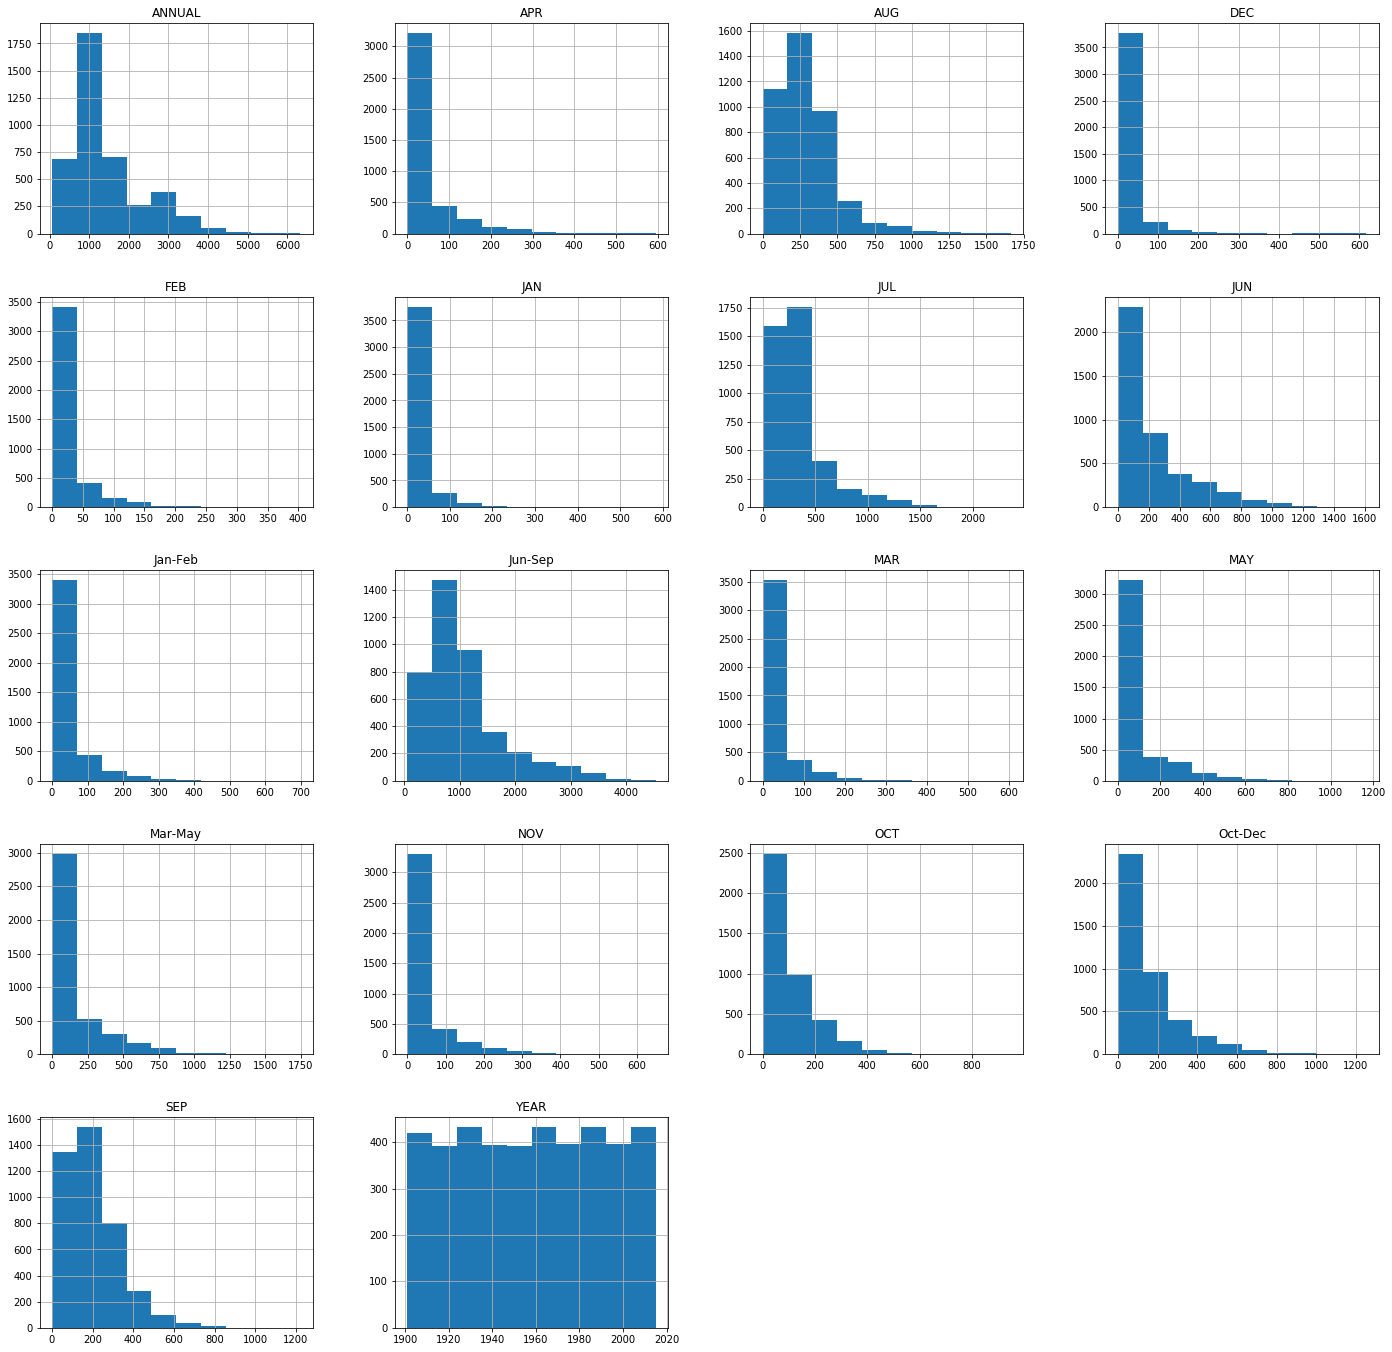

In [6]:
data.hist(figsize=(24,24))

Annual rainfall from Year 1900 to 2015


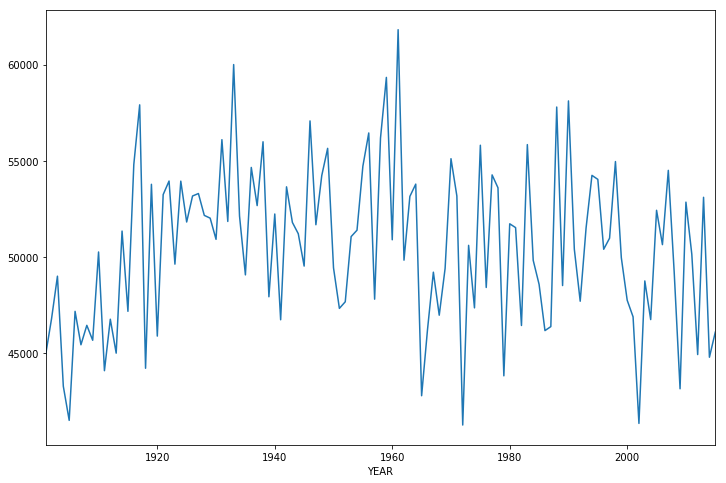

In [7]:
print("Annual rainfall from Year 1900 to 2015")
data.groupby("YEAR").sum()['ANNUAL'].plot(figsize=(12,8))

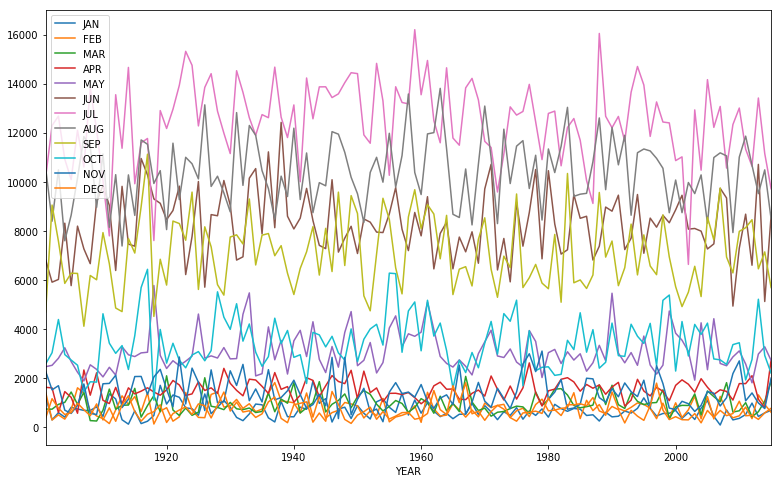

In [8]:
data[['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("YEAR").sum().plot(figsize=(13,8))

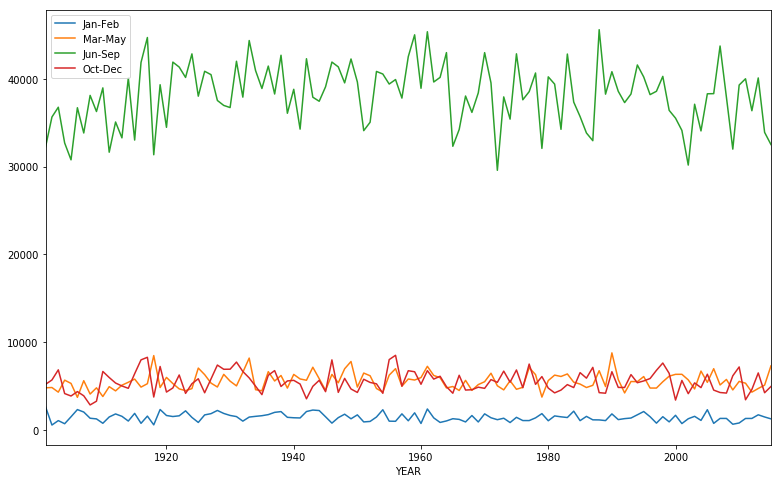

In [9]:
data[['YEAR','Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']].groupby("YEAR").sum().plot(figsize=(13,8));

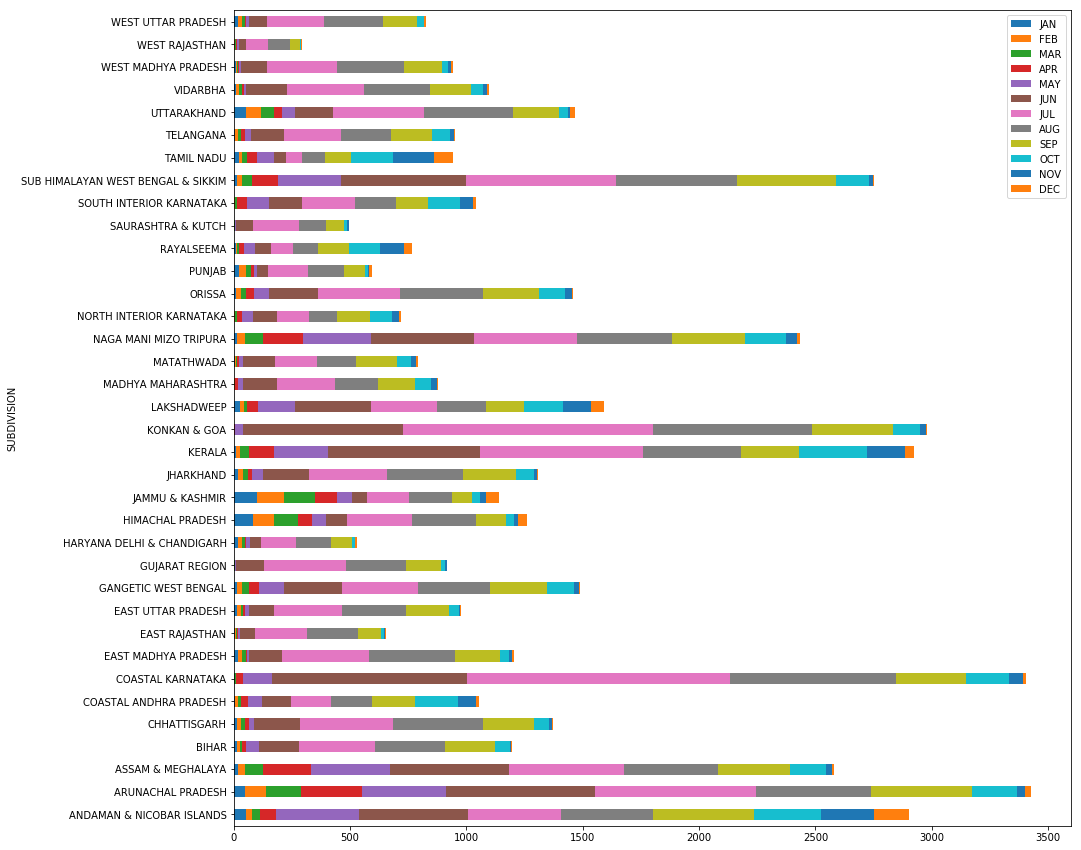

In [10]:
data[['SUBDIVISION', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("SUBDIVISION").mean().plot.barh(stacked=True,figsize=(15,15))

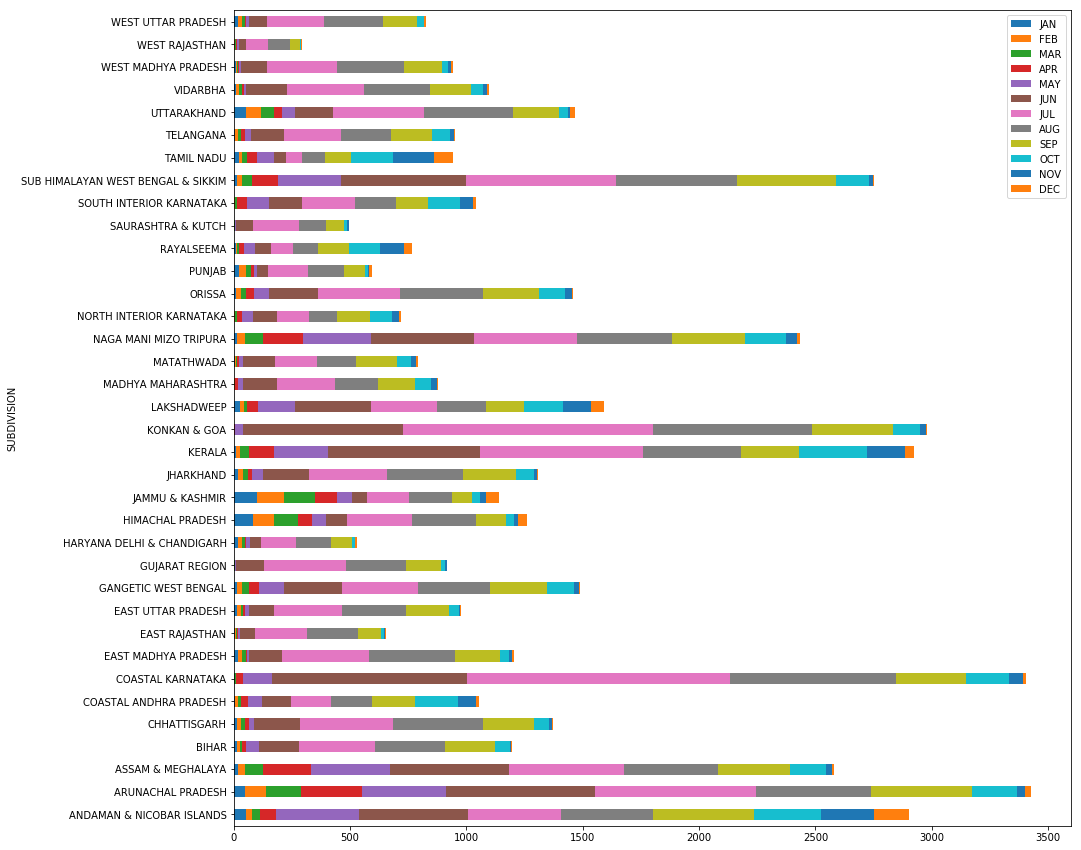

In [11]:
data[['SUBDIVISION', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("SUBDIVISION").mean().plot.barh(stacked=True,figsize=(15,15))

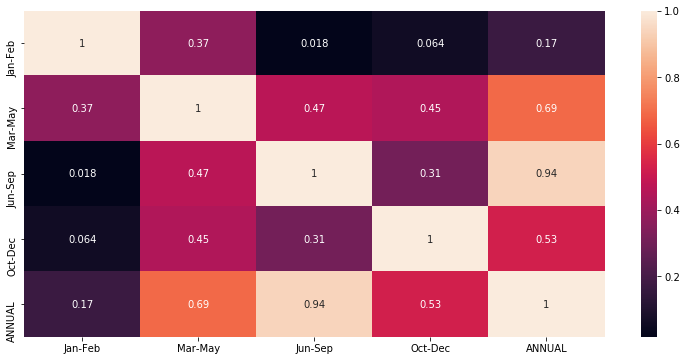

In [12]:
plt.figure(figsize=(13,6)) 
sb.heatmap(data[['Jan-Feb','Mar-May','Jun-Sep','Oct-Dec','ANNUAL']].corr(),annot=True) 
plt.show()

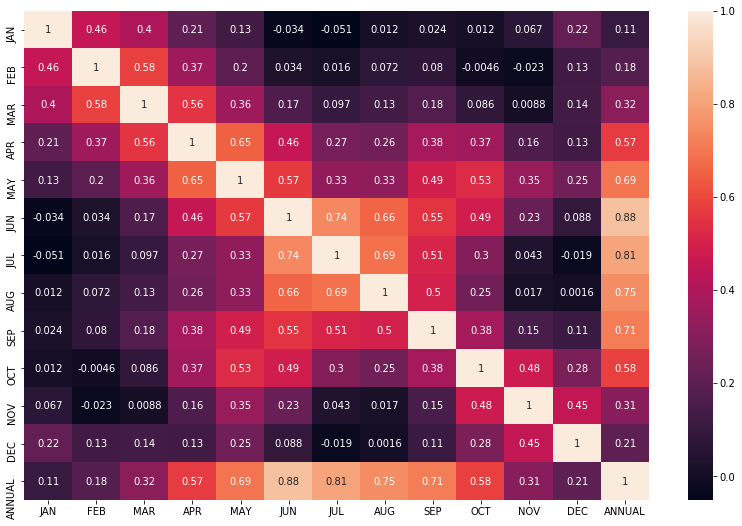

In [13]:
plt.figure(figsize=(14,9)) 
sb.heatmap(data[['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC','ANNUAL']].corr(),annot=True) 
plt.show()

In [14]:
#Function to plot the graph
def plot_graphs(groundtruth,prediction,title):
    N=9
    ind = np.arange(N)
    width=0.27
    
    fig = plt.figure()
    fig.suptitle(title, fontsize=12) 
    ax = fig.add_subplot(111)
    rects1 = ax.bar(ind, groundtruth, width, color='r') 
    rects2 = ax.bar(ind+width, prediction, width, color='g')
    
    ax.set_ylabel("Amount of rainfall") 
    ax.set_xticks(ind+width)
    ax.set_xticklabels( ('APR', 'MAY', 'JUN', 'JUL','AUG', 'SEP', 'OCT', 'NOV', 'DEC') ) 
    ax.legend( (rects1[0], rects2[0]), ('Ground truth', 'Prediction') )
 
    for rect in rects1:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h), ha='center', va='bottom')
    for rect in rects2:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h), ha='center', va='bottom')

    plt.show()


In [15]:
# seperation of training and testing data 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_absolute_error
division_data = np.asarray(data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']])
X = None; y = None
for i in range(division_data.shape[1]-3):
    if X is None:
        X = division_data[:, i:i+3] 
        y = division_data[:, i+3]
    else:
        X = np.concatenate((X, division_data[:, i:i+3]), axis=0) 
        y = np.concatenate((y, division_data[:, i+3]), axis=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [16]:
#test 2010 
temp = data[['SUBDIVISION','JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[data['YEAR'] == 2010]
data_2010 = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[temp['SUBDIVISION'] == 'TAMIL NADU'])
X_year_2010 = None; y_year_2010 = None 
for i in range(data_2010.shape[1]-3): 
    if X_year_2010 is None: 
        X_year_2010 = data_2010[:, i:i+3] 
        y_year_2010 = data_2010[:, i+3] 
    else: 
        X_year_2010 = np.concatenate((X_year_2010, data_2010[:, i:i+3]), axis=0) 
        y_year_2010 = np.concatenate((y_year_2010, data_2010[:, i+3]), axis=0)


In [17]:
#test 2005 
temp = data[['SUBDIVISION','JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[data['YEAR'] == 2005]
data_2005 = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[temp['SUBDIVISION'] == 'TAMIL NADU'])
X_year_2005 = None; y_year_2005 = None 
for i in range(data_2005.shape[1]-3): 
    if X_year_2005 is None: 
        X_year_2005 = data_2005[:, i:i+3] 
        y_year_2005 = data_2005[:, i+3] 
    else: 
        X_year_2005 = np.concatenate((X_year_2005, data_2005[:, i:i+3]), axis=0) 
        y_year_2005 = np.concatenate((y_year_2005, data_2005[:, i+3]), axis=0)


In [18]:
#test 2015 
temp = data[['SUBDIVISION','JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[data['YEAR'] == 2015]
data_2015 = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[temp['SUBDIVISION'] == 'TAMIL NADU'])
X_year_2015 = None; y_year_2015 = None 
for i in range(data_2015.shape[1]-3):
    if X_year_2015 is None: 
        X_year_2015 = data_2015[:, i:i+3] 
        y_year_2015 = data_2015[:, i+3] 
    else: 
        X_year_2015 = np.concatenate((X_year_2015, data_2015[:, i:i+3]), axis=0) 
        y_year_2015 = np.concatenate((y_year_2015, data_2015[:, i+3]), axis=0)


In [19]:
from sklearn import linear_model
# linear model 
reg = linear_model.ElasticNet(alpha=0.5) 
reg.fit(X_train, y_train) 
y_pred = reg.predict(X_test) 
print(mean_absolute_error(y_test, y_pred))

96.32435229744083


MEAN 2005
147.3111111111111 154.89409610331137
Standard deviation 2005
97.07130763223547 70.26461054053205
MEAN 2010
120.15555555555557 138.52491051795909
Standard deviation 2010
80.8999397213223 58.06819529310178
MEAN 2015
130.25555555555556 144.1460886007419
Standard deviation 2015
93.7362625325986 70.61860433793973


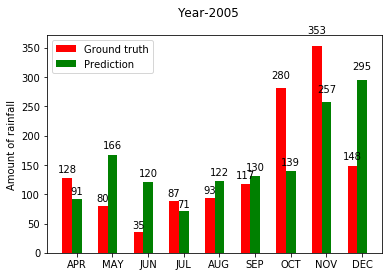

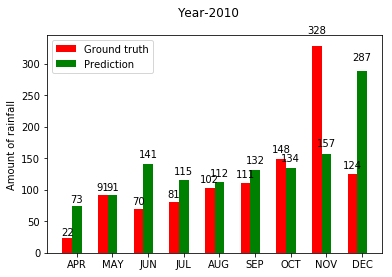

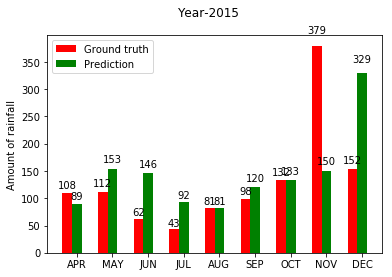

In [20]:
#2005 
y_year_pred_2005 = reg.predict(X_year_2005)

#2010 
y_year_pred_2010 = reg.predict(X_year_2010)

#2015
y_year_pred_2015 = reg.predict(X_year_2015)

print("MEAN 2005") 
print(np.mean(y_year_2005),np.mean(y_year_pred_2005)) 
print("Standard deviation 2005") 
print(np.sqrt(np.var(y_year_2005)),np.sqrt(np.var(y_year_pred_2005)))

print("MEAN 2010")
print(np.mean(y_year_2010),np.mean(y_year_pred_2010)) 
print("Standard deviation 2010") 
print(np.sqrt(np.var(y_year_2010)),np.sqrt(np.var(y_year_pred_2010)))

print("MEAN 2015") 
print(np.mean(y_year_2015),np.mean(y_year_pred_2015)) 
print("Standard deviation 2015") 
print(np.sqrt(np.var(y_year_2015)),np.sqrt(np.var(y_year_pred_2015)))

plot_graphs(y_year_2005,y_year_pred_2005,"Year-2005") 
plot_graphs(y_year_2010,y_year_pred_2010,"Year-2010") 
plot_graphs(y_year_2015,y_year_pred_2015,"Year-2015")

In [21]:
# spliting training and testing data only for Tamil Nadu 
tamilNadu = np.asarray(data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[data['SUBDIVISION'] == 'TAMIL NADU'])
X = None; y = None 
for i in range(tamilNadu.shape[1]-3): 
    if X is None: 
        X = tamilNadu[:, i:i+3] 
        y = tamilNadu[:, i+3] 
    else: 
        X = np.concatenate((X, tamilNadu[:, i:i+3]), axis=0) 
        y = np.concatenate((y, tamilNadu[:, i+3]), axis=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)


In [22]:
 from sklearn import linear_model
# linear model 
reg = linear_model.ElasticNet(alpha=0.5) 
reg.fit(X_train, y_train) 
y_pred = reg.predict(X_test) 
print (mean_absolute_error(y_test, y_pred))


37.41985370024699


MEAN 2005
147.3111111111111 111.15287168624565
Standard deviation 2005
97.07130763223547 32.87540585923574
MEAN 2010
120.15555555555557 101.35072505381403
Standard deviation 2010
80.8999397213223 30.369182563251638
MEAN 2015
130.25555555555556 104.79014811753535
Standard deviation 2015
93.7362625325986 27.631385420897395


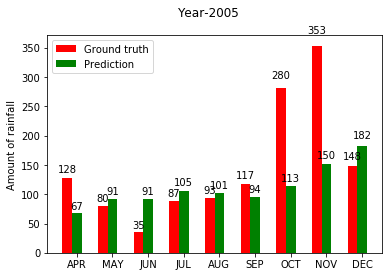

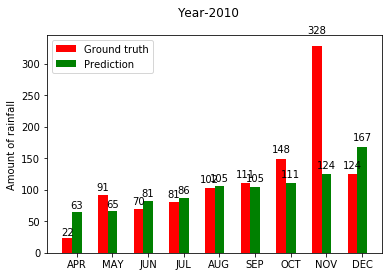

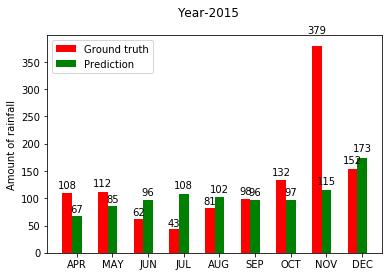

In [23]:
#2005 
y_year_pred_2005 = reg.predict(X_year_2005)

#2010 
y_year_pred_2010 = reg.predict(X_year_2010)

#2015 
y_year_pred_2015 = reg.predict(X_year_2015)

print ("MEAN 2005") 
print (np.mean(y_year_2005),np.mean(y_year_pred_2005))
print ("Standard deviation 2005")
print (np.sqrt(np.var(y_year_2005)),np.sqrt(np.var(y_year_pred_2005)))

print ("MEAN 2010") 
print (np.mean(y_year_2010),np.mean(y_year_pred_2010)) 
print ("Standard deviation 2010") 
print (np.sqrt(np.var(y_year_2010)),np.sqrt(np.var(y_year_pred_2010)))

print ("MEAN 2015") 
print (np.mean(y_year_2015),np.mean(y_year_pred_2015)) 
print ("Standard deviation 2015") 
print (np.sqrt(np.var(y_year_2015)),np.sqrt(np.var(y_year_pred_2015)))

plot_graphs(y_year_2005,y_year_pred_2005,"Year-2005")
plot_graphs(y_year_2010,y_year_pred_2010,"Year-2010") 
plot_graphs(y_year_2015,y_year_pred_2015,"Year-2015")
